# Assignment 1: Exploring and Visualizing Data - Oscar Hernandez

## Purpose

The purpose of this exercise is to explore the results from the MSPA Software Survey that was collected in December 2016. As MSDS academic administrators, we are tasked with defining the future direction of the graduate program while incorporating feedback from students. The results of the survey provides us information about the software preferences, interest in new courses and other information relevant to data science curriculum planning. The following report will outline key findings of the MSPA Software Survey and make recommendations on what to incorporate into the graduate program.  

### Section 1 - Setting up the dataframe 

In [21]:
#To complete this exercise, we need to utilize certain libraries 
#This block of code imports all the ones we will need
#Code Credit: Jump-Start Example: Python analysis of MSPA Software Survey
# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid") #background color of the plots
sns.set_context({"figure.figsize": (12, 6.5)}) #size of each plot 

In [22]:
#One of the most popular visuals to show correlation is a heat map 
#This function creates a heat map which will be used in the exercise
def corr_chart(df_corr):
    corr=df_corr.corr()
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) 
    plt.yticks(rotation=0) 
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [23]:
#This code block loads the data from the MSPA Software Survey
survey_data = pd.read_csv("mspa-survey-data.csv")

In [24]:
#Since each observation is pertaining to a student, we will make
#RespondentID the label for each observation with the following code 
survey_data.set_index('RespondentID', drop = True, inplace = True)

In [25]:
#Using the rename function will change the names of the all the software columns
#We want shorter column names 
survey_df = survey_data.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

##### Key Takeaway
* This section outlines which libraries were loaded to complete the exercise, loading the CSV file from our working directory, taking a quick look at the dataframe and shortening the names of the columns 

### Section 2 - Software Variables Analysis

In [26]:
#First, we will create a new dataframe with just the renamed 
#software variables 
software_df = survey_df.loc[:, "My_Java":"Ind_SAS"]

In [27]:
#This output shows descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

<Figure size 864x468 with 0 Axes>

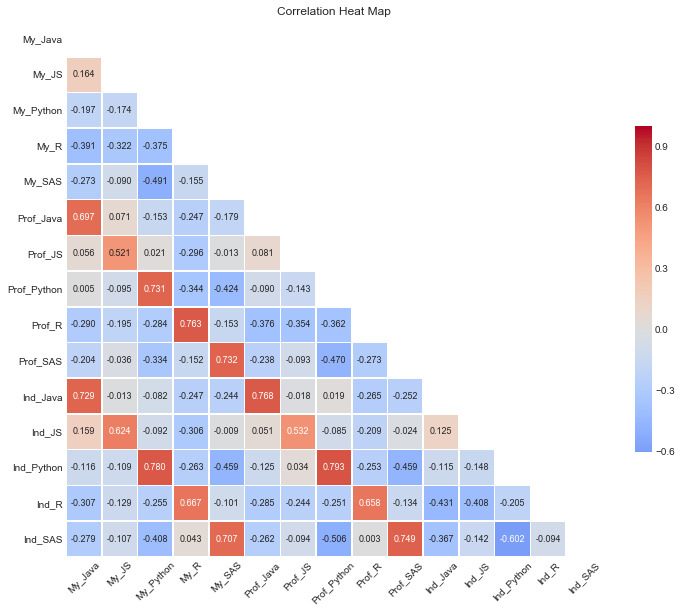

In [28]:
#The corr_chart function created earlier shows the correlation between 
#all the software preference variables 
corr_chart(software_df)
plt.show()

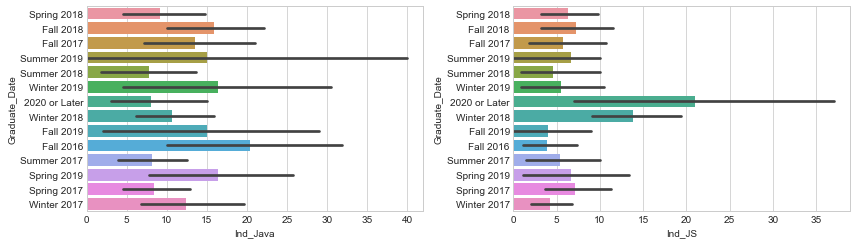

In [29]:
#Let's study the Industry variables a bit more because the MSDS program
#wants to prepare students for what they believe the industry values

#Using seaborn, let's create barplots of two of the Industry variables 
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.barplot(x="Ind_Java", y="Graduate_Date", data=survey_df)

ax2 = fig.add_subplot(222)
sns.barplot(x="Ind_JS", y="Graduate_Date", data=survey_df)

plt.tight_layout()
plt.show()

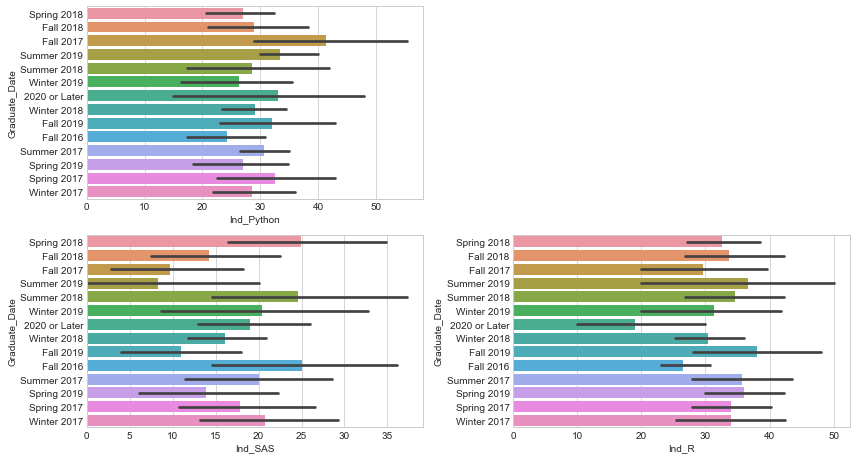

In [30]:
#Plot the remaining three Industry variables 
fig = plt.figure()

ax3 = fig.add_subplot(221)
sns.barplot(x="Ind_Python", y="Graduate_Date", data=survey_df)

ax4 = fig.add_subplot(223)
sns.barplot(x="Ind_SAS", y="Graduate_Date", data=survey_df)

ax5 = fig.add_subplot(224)
sns.barplot(x="Ind_R", y="Graduate_Date", data=survey_df)

plt.tight_layout()
plt.show()

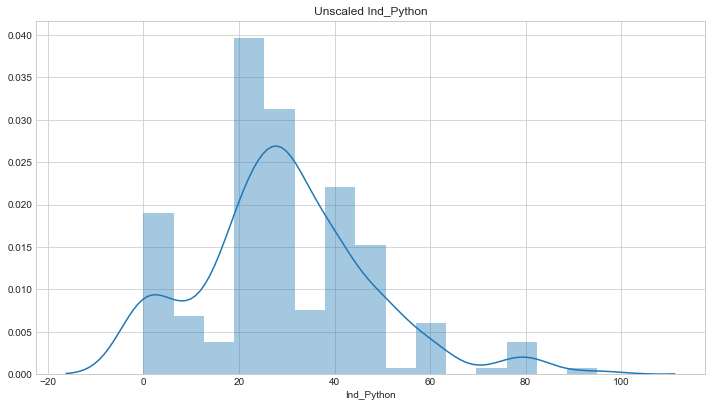

In [31]:
#Learning Python seems to be an important skills for data science students
#Let's take a look at the distribution of the Ind_Python variable 
#The next block of code will output the untransformed version of the variable 

# Select variable that we want to examine and eliminating missing data 
X = survey_df['Ind_Python'].dropna()

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled Ind_Python')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

plt.show()

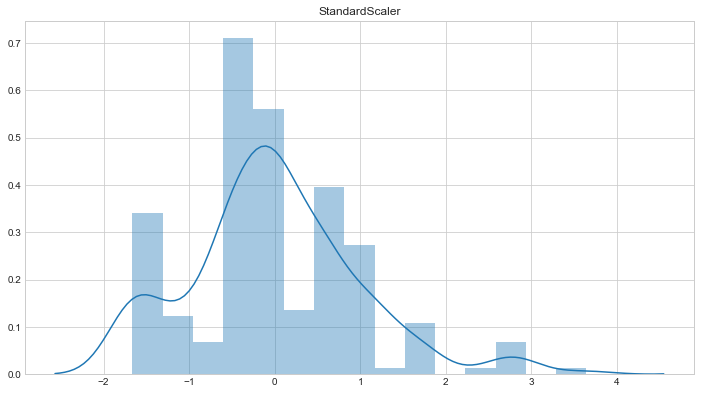

In [38]:
#Scale the Ind_Python using scikit-learn's StandardScaler transformer 
X2 = survey_df['Ind_Python'].dropna().values.reshape(-1,1)

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X2)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

plt.show()

##### Key Takeaways
* Notice that the shape of the distribution remained the same for the Ind_Python variable after completing a transformation. The values for the Ind_Python variable were the only items that changed. 
* The colorful seaborn plots show us how different graduating classes feel about the Industry variables 
* The correlation heat map indicates the sentiment when comparing two software variables at a time
* Based on descriptive statistics, learning R and Python are the top two languages that students need to learn for profesional reason 

### Section 2 - Future Courses Analysis

In [33]:
#Let's create a new dataframe that includes the data from the student responses
#about the addition of future courses and the number of courses they completed 
future_df = survey_df.loc[:, 'Python_Course_Interest': 'Courses_Completed']

In [34]:
#Partial output the first five lines of new dataframe
future_df.iloc[0:5, 0:3].head()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest
RespondentID,,,
5135740122,50.0,90.0,51.0
5133300037,20.0,50.0,90.0
5132253300,100.0,70.0,100.0
5132096630,85.0,60.0,90.0
5131990362,60.0,10.0,40.0


In [35]:
#This output shows descriptive statistics for future classes variables
print('\nDescriptive statistics for futures_df -----------------')
print(future_df.describe())


Descriptive statistics for futures_df -----------------
       Python_Course_Interest  Foundations_DE_Course_Interest  \
count              206.000000                      200.000000   
mean                73.529126                       58.045000   
std                 29.835429                       32.588079   
min                  0.000000                        0.000000   
25%                 53.000000                       29.500000   
50%                 82.500000                       60.000000   
75%                100.000000                       89.250000   
max                100.000000                      100.000000   

       Analytics_App_Course_Interest  Systems_Analysis_Course_Interest  \
count                     203.000000                        200.000000   
mean                       55.201970                         53.630000   
std                        34.147954                         33.539493   
min                         0.000000                         

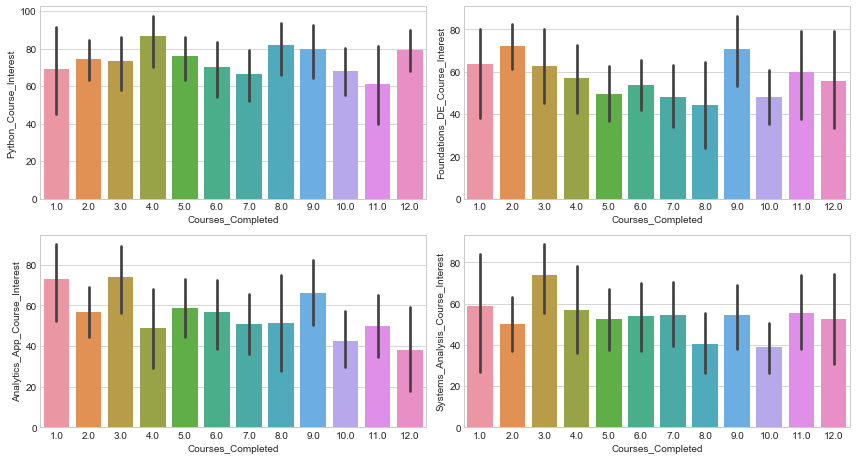

In [39]:
#Visualize the future class variable responses based on classes completed 
fig = plt.figure()
ax1 = fig.add_subplot(221)
sns.barplot(x="Courses_Completed", y="Python_Course_Interest", 
            data=survey_df)
ax2 = fig.add_subplot(222)
sns.barplot(x="Courses_Completed", y="Foundations_DE_Course_Interest", 
            data=survey_df)
ax3 = fig.add_subplot(223)
sns.barplot(x="Courses_Completed", y="Analytics_App_Course_Interest", 
            data=survey_df)
ax4 = fig.add_subplot(224)
sns.barplot(x="Courses_Completed", y="Systems_Analysis_Course_Interest", 
            data=survey_df)
plt.tight_layout()
plt.show()

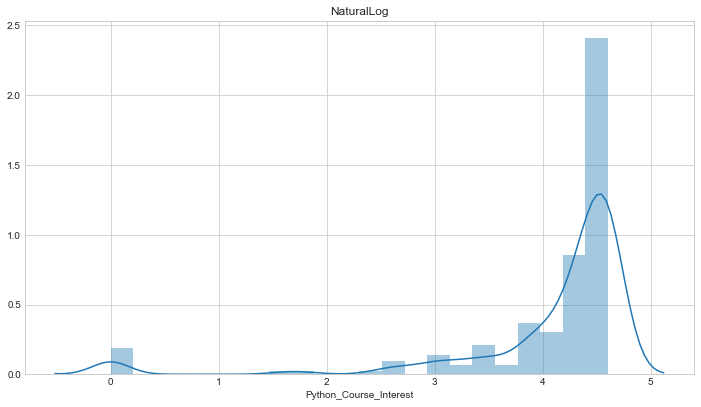

In [37]:
#Let's do a log transformation of the Python_Course_Interest variable
#Log transformation cannot work with 0 values so we will add 1 constant 
#to all observations that had a 0 values
#We feel comfortable doing this because a student with an interest of 0 
#and 1 is immaterial 
X3= survey_df['Python_Course_Interest'].dropna()
X3[X3==0] = 1

log_fig, ax = plt.subplots()
sns.distplot(np.log(X3)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

plt.show()

##### Key Takeaway
* After doing a log transformation of the Python_Course_Interest variable we noticed that the shape of the distribution did not change drastically (although the untransformed distribution was not displayed 
* The colorful seaborn barplots shows us the different interest levels for each new course depending on the amount of classes students have taken. The results are mixed but one trend seems to be that the less classes they have taken, the higher interest level in potential future classes
* Based on the descripitive statistics, the new Python course seems to show the highest interest on average among students while the systems analysis has the lowest interest on average


### Section 3 - Final Recommendations

Based on the results of the survey data, the MSDS program should develop courses that have an R or Python version. If only one language had to be chosen, it would be Python since approximately 73% of the students stated they would be interested in a new Python course. Furthermore, the Python course interest data compared with the number of courses completed data, shows that students with either low or high amounts of courses completed want to learn Python. One final conclusion from this analysis is that MSDS shouldn't teach a class in Python. Instead, the program could outsource this source via a different learning platform so that MSDS could develop more data engineering courses.  